In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from keras.layers import BatchNormalization, Lambda, Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.layers.merge import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)
%matplotlib inline


In [2]:
def mycolournet(num_classes):
    input_image = Input(shape=(56,56,3))
    layer1 = MaxPooling2D(pool_size=(1,1),strides=(1,1),input_shape=(56,56,3))(input_image)
    
    blueinput =  Lambda(lambda x : x[:,:,:,0:1])(layer1)
    greeninput =  Lambda(lambda x : x[:,:,:,1:2])(layer1)
    redinput =  Lambda(lambda x : x[:,:,:,:2])(layer1)
    
    ##blueinput= torch.Tensor(blueinput)
    ##redinput= torch.Tensor(redinput)
    ##greeninput= torch.Tensor(greeninput)
    
    ##blueinput=blueinput.unsqueeze(dim=-1)
    ##greeninput=greeninput.unsqueeze(dim=-1)
    ##redinput= redinput.unsqueeze(dim=-1)
    
    ##blueinput=np.array(blueinput)
    ##greeninput=np.array(greeninput)
    ##redinput=np.array(redinput)
    
    blueconv1 = Convolution2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(blueinput)
    blueconv1 = BatchNormalization()(blueconv1)
    blueconv1 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(blueconv1)
    
    greenconv1 = Convolution2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(greeninput)
    greenconv1 = BatchNormalization()(greenconv1)
    greenconv1 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(greenconv1)
    
    redconv1 = Convolution2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(redinput)
    redconv1 = BatchNormalization()(redconv1)
    redconv1 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(redconv1)
    
    blueconv2 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(blueconv1)
    blueconv2 = BatchNormalization()(blueconv2)
    blueconv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(blueconv2)
    
    greenconv2 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(greenconv1)
    greenconv2 = BatchNormalization()(greenconv2)
    greenconv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(greenconv2)
    
    redconv2 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(redconv1)
    redconv2 = BatchNormalization()(redconv2)
    redconv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(redconv2)
    
    blueflatten = Flatten()(blueconv2)
    greenflatten = Flatten()(greenconv2)
    redflatten = Flatten()(redconv2)
    
    blueFC_1 = Dense(units=1000, activation='relu')(blueflatten)
    blueFC_1 = Dropout(0.6)(blueFC_1)
    blueFC_2 = Dense(units=1, activation='relu')(blueFC_1)
    
    greenFC_1 = Dense(units=1000, activation='relu')(greenflatten)
    greenFC_1 = Dropout(0.6)(greenFC_1)
    greenFC_2 = Dense(units=1, activation='relu')(greenFC_1)
    
    redFC_1 = Dense(units=1000, activation='relu')(redflatten)
    redFC_1 = Dropout(0.6)(redFC_1)
    redFC_2 = Dense(units=1, activation='relu')(redFC_1)
    
    concatoutput = Concatenate()([blueFC_2, greenFC_2,redFC_2])
    
    commonFC_1 = Dense(units=20, activation='relu'  )(concatoutput)
    commonFC_2 = Dense(units=50, activation = 'relu')(commonFC_1)
    commonFC_3 = Dense(units=30, activation= 'relu')(commonFC_2)
    output = Dense(units=num_classes,activation='softmax' )(commonFC_3)
    
    model = Model(inputs=input_image,outputs=output)
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    # sgd = SGD(lr=0.01, momentum=0.9, decay=0.0005, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model




In [5]:
model = mycolournet(3) #for two classes, i.e blue and red

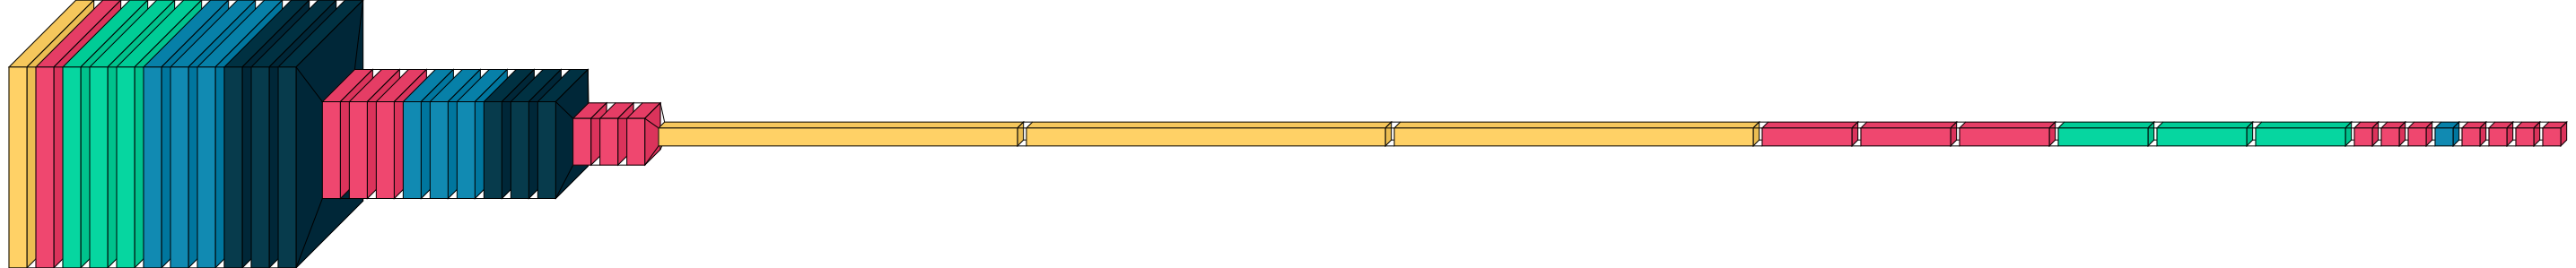

In [6]:
import visualkeras



visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [4]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 56, 56, 3)]  0                                            
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 56, 56, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 56, 56, 1)    0           max_pooling2d[0][0]              
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 56, 56, 1)    0           max_pooling2d[0][0]              
______________________________________________________________________________________________

In [5]:
os.chdir('data/colors')
if os.path.isdir('train/blue') is False:
    os.makedirs('train/blue')
    os.makedirs('train/red')
    os.makedirs('test/blue')
    os.makedirs('test/red')
    os.makedirs('valid/blue')
    os.makedirs('valid/red')
    
os.chdir('../../')  

In [ ]:
train_path = 'data/colors/train'
valid_path = 'data/colors/valid'
test_path = 'data/colors/test'





In [10]:

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(56,56), classes=['orange', 'red', 'yellow', 'brown'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(56,56), classes=['orange', 'red','yellow', 'brown'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(56,56), classes=['orange', 'red','yellow','brown'], batch_size=10, shuffle=False)

Found 646 images belonging to 4 classes.
Found 41 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [11]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=100,
    verbose=2
)

Epoch 1/100


C:\Users\Debjyoty\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


65/65 - 23s - loss: 1.3530 - accuracy: 0.3638 - val_loss: 1.2797 - val_accuracy: 0.3902
Epoch 2/100
65/65 - 20s - loss: 1.0630 - accuracy: 0.5341 - val_loss: 0.9953 - val_accuracy: 0.5122
Epoch 3/100
65/65 - 20s - loss: 0.8827 - accuracy: 0.6161 - val_loss: 1.1650 - val_accuracy: 0.4390
Epoch 4/100
65/65 - 21s - loss: 0.7608 - accuracy: 0.6687 - val_loss: 0.7866 - val_accuracy: 0.6341
Epoch 5/100
65/65 - 20s - loss: 0.6211 - accuracy: 0.7585 - val_loss: 0.8630 - val_accuracy: 0.6098
Epoch 6/100
65/65 - 21s - loss: 0.5738 - accuracy: 0.7492 - val_loss: 0.7909 - val_accuracy: 0.7317
Epoch 7/100
65/65 - 21s - loss: 0.5693 - accuracy: 0.7693 - val_loss: 0.8725 - val_accuracy: 0.6098
Epoch 8/100
65/65 - 21s - loss: 0.5593 - accuracy: 0.7647 - val_loss: 0.6602 - val_accuracy: 0.7073
Epoch 9/100
65/65 - 21s - loss: 0.4637 - accuracy: 0.8080 - val_loss: 0.8490 - val_accuracy: 0.6829
Epoch 10/100
65/65 - 21s - loss: 0.4490 - accuracy: 0.8080 - val_loss: 0.9512 - val_accuracy: 0.6098
Epoch 11/10

KeyboardInterrupt: 

In [13]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(56,56), classes=[ 'orange', 'yellow'], batch_size=10,class_mode='categorical')
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(56,56), classes=[ 'orange', 'yellow'], batch_size=10,class_mode='categorical')
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(56,56), classes=[ 'orange','yellow'], batch_size=10,class_mode='categorical', shuffle=False)

Found 236 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [14]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
24/24 - 9s - loss: 0.6284 - accuracy: 0.6653
Epoch 2/10
24/24 - 7s - loss: 0.4049 - accuracy: 0.8390
Epoch 3/10
24/24 - 7s - loss: 0.2823 - accuracy: 0.8941
Epoch 4/10
24/24 - 7s - loss: 0.2326 - accuracy: 0.9153
Epoch 5/10
24/24 - 7s - loss: 0.1507 - accuracy: 0.9534
Epoch 6/10
24/24 - 7s - loss: 0.1102 - accuracy: 0.9576
Epoch 7/10
24/24 - 7s - loss: 0.0877 - accuracy: 0.9703
Epoch 8/10
24/24 - 8s - loss: 0.0759 - accuracy: 0.9746
Epoch 9/10
24/24 - 9s - loss: 0.0678 - accuracy: 0.9746
Epoch 10/10
24/24 - 7s - loss: 0.0186 - accuracy: 0.9958


In [15]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(56,56), classes=['blue', 'green', 'purple'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(56,56), classes=['blue', 'green', 'purple'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(56,56), classes=['blue', 'green', 'purple'], batch_size=10, shuffle=False)

Found 454 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 2 images belonging to 3 classes.


In [16]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=100,
    verbose=2
)

Epoch 1/100
46/46 - 16s - loss: 1.0062 - accuracy: 0.5308 - val_loss: 0.7146 - val_accuracy: 0.5333
Epoch 2/100
46/46 - 14s - loss: 0.5223 - accuracy: 0.7577 - val_loss: 0.5631 - val_accuracy: 0.5667
Epoch 3/100
46/46 - 14s - loss: 0.4963 - accuracy: 0.7907 - val_loss: 0.6350 - val_accuracy: 0.6000
Epoch 4/100
46/46 - 14s - loss: 0.4405 - accuracy: 0.8062 - val_loss: 0.4741 - val_accuracy: 0.6000
Epoch 5/100
46/46 - 14s - loss: 0.4242 - accuracy: 0.7885 - val_loss: 0.5199 - val_accuracy: 0.6000
Epoch 6/100
46/46 - 14s - loss: 0.4026 - accuracy: 0.8106 - val_loss: 0.7846 - val_accuracy: 0.6000
Epoch 7/100
46/46 - 14s - loss: 0.3720 - accuracy: 0.8260 - val_loss: 0.5672 - val_accuracy: 0.6000
Epoch 8/100
46/46 - 14s - loss: 0.3514 - accuracy: 0.8150 - val_loss: 0.6240 - val_accuracy: 0.6000
Epoch 9/100
46/46 - 14s - loss: 0.3191 - accuracy: 0.8348 - val_loss: 0.7646 - val_accuracy: 0.6000
Epoch 10/100
46/46 - 14s - loss: 0.2961 - accuracy: 0.8458 - val_loss: 0.9806 - val_accuracy: 0.6000

KeyboardInterrupt: 

In [8]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(56,56), classes=['blue', 'red'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(56,56), classes=['blue', 'red'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(56,56), classes=['blue', 'red'], batch_size=10, shuffle=False)

Found 366 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [70]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=20,
    verbose=2
)

Epoch 1/20
17/17 - 5s - loss: 0.6933 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
17/17 - 5s - loss: 0.6933 - accuracy: 0.4691 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
17/17 - 5s - loss: 0.6933 - accuracy: 0.5185 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
17/17 - 5s - loss: 0.6934 - accuracy: 0.4259 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
17/17 - 5s - loss: 0.6934 - accuracy: 0.4815 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
17/17 - 5s - loss: 0.6933 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
17/17 - 5s - loss: 0.6932 - accuracy: 0.5185 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/20
17/17 - 5s - loss: 0.6931 - accuracy: 0.5185 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 9/20
17/17 - 6s - loss: 0.6931 - accuracy: 0.5185 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/20
17/17 - 6s - loss: 0.6929 - accuracy: 0.5185 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 11/20
17/17 -

In [21]:
item,label = next(test_batches)
pred= model.predict(x= test_batches, steps = len(test_batches), verbose = 2)


1/1 - 1s


In [22]:
pred

array([[9.999914e-01, 8.615208e-06]], dtype=float32)

In [25]:
predclass= np.argmax(pred)

In [26]:
predclass

0

In [8]:
import cv2 as cv
import numpy as np
import pandas as pd

In [9]:
path= "blueimg1.jpg"
img= cv.imread(path)

In [18]:
img=cv.resize(img, (56,56))
imgarray= image.img_to_array(img)
imgbatch= np.expand_dims(imgarray,axis=0)
imgpreprocess=tf.keras.applications.vgg16.preprocess_input(imgbatch)

In [2]:
pred= model.predict(imgpreprocess)

NameError: name 'model' is not defined

In [20]:
pred

array([[0.38193777, 0.15231289, 0.46574935]], dtype=float32)

In [1]:
model.save_weights('models/my_model_weights.h5')

NameError: name 'model' is not defined

In [18]:
model.save('models/firstmodel.h5')